# 02. Trouble404/kaggle-Job-Salary-Prediction

## Predictions with ML Regression Models - Train_rev1.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
salary_data = pd.read_csv('02_Train_rev1.csv')

In [3]:
# Print the shape of the dataset
print(salary_data.shape)

(244768, 12)


In [4]:
# First 5 rows of the dataset
salary_data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [5]:
# Last 5 rows of the dataset
salary_data.tail()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk
244767,72705235,Accountant,This entrepreneurial and growing private equit...,Hitchin,Hitchin,NaN,permanent,NaN,Teaching Jobs,"40-45,000",42500,hays.co.uk


## Preprocessing

In [6]:
# First, remore rows whose normalized salary values are greater than 100K (there are 297 of them)
outliers = salary_data[salary_data['SalaryNormalized'] > 100000].index
salary_data.drop(outliers, axis=0, inplace=True)

In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244471 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244471 non-null  int64 
 1   Title               244470 non-null  object
 2   FullDescription     244471 non-null  object
 3   LocationRaw         244471 non-null  object
 4   LocationNormalized  244471 non-null  object
 5   ContractType        65387 non-null   object
 6   ContractTime        180628 non-null  object
 7   Company             212144 non-null  object
 8   Category            244471 non-null  object
 9   SalaryRaw           244471 non-null  object
 10  SalaryNormalized    244471 non-null  int64 
 11  SourceName          244471 non-null  object
dtypes: int64(2), object(10)
memory usage: 24.2+ MB


In [8]:
# Simplify the job titles into these words below
title_simp = []
for x in salary_data['Title']:
    if type(x) == float:                  title_simp.append('OTHER')
    elif 'manager' in x.lower():          title_simp.append('MANAGER')
    elif 'engineer' in x.lower():         title_simp.append('ENGINEER')
    elif 'developer' in x.lower():        title_simp.append('DEVELOPER')
    elif 'executive' in x.lower():        title_simp.append('EXECUTIVE')
    elif 'analyst' in x.lower():          title_simp.append('ANALYST')
    elif 'administrator' in x.lower():    title_simp.append('ADMINISTRATOR')
    elif 'accountant' in x.lower():       title_simp.append('ACCOUNTANT')
    elif 'teach' in x.lower():            title_simp.append('TEACHER')
    elif 'worker' in x.lower():           title_simp.append('WORKER')
    elif 'officer' in x.lower():          title_simp.append('OFFICER')
    else:                                 title_simp.append('OTHER')
salary_data['TitleSimp'] = title_simp
salary_data['TitleSimp'].value_counts()

OTHER            110625
MANAGER           50032
ENGINEER          25267
DEVELOPER         13564
EXECUTIVE         10137
ANALYST            8819
TEACHER            7477
ADMINISTRATOR      6224
WORKER             5032
ACCOUNTANT         3686
OFFICER            3608
Name: TitleSimp, dtype: int64

In [9]:
# Simplify the job categories into these words below
cat_simp = []
for x in salary_data['Category']:
    if 'it jobs' in x.lower() or 'engineer' in x.lower():    cat_simp.append('ENGINEER')
    elif 'sales' in x.lower() or 'retail' in x.lower():      cat_simp.append('SALES')
    elif 'finance' in x.lower():        cat_simp.append('FINANCE')
    elif 'health' in x.lower():         cat_simp.append('HEALTH')
    elif 'teach' in x.lower():          cat_simp.append('EDUCATION')
    elif 'advertising' in x.lower():    cat_simp.append('ADVERTISEMENT')
    elif 'energy' in x.lower():         cat_simp.append('ENERGY')
    elif 'service' in x.lower() or 'catering' in x.lower():  cat_simp.append('SERVICE')
    elif 'recruit' in x.lower():        cat_simp.append('RECRUITMENT')
    else:    cat_simp.append('OTHER')
salary_data['CategorySimp'] = cat_simp
salary_data['CategorySimp'].value_counts()

OTHER            65405
ENGINEER         63617
SALES            23852
FINANCE          21771
HEALTH           20971
SERVICE          17411
EDUCATION        12633
ADVERTISEMENT     8851
RECRUITMENT       7713
ENERGY            2247
Name: CategorySimp, dtype: int64

In [10]:
# Change contract types to also include unknowns
contract_type_edit = []
for x in salary_data['ContractType']:
    if type(x) == float:
        contract_type_edit.append('UNKNOWN')
    elif x == 'full_time':
        contract_type_edit.append('FULL_TIME')
    elif x == 'part_time':
        contract_type_edit.append('PART_TIME')
salary_data['ContractTypeEdit'] = contract_type_edit
salary_data['ContractTypeEdit'].value_counts()

UNKNOWN      179084
FULL_TIME     57490
PART_TIME      7897
Name: ContractTypeEdit, dtype: int64

In [11]:
# Change contract times to also include unknowns
contract_time_edit = []
for x in salary_data['ContractTime']:
    if type(x) == float:
        contract_time_edit.append('UNKNOWN')
    elif x == 'permanent':
        contract_time_edit.append('PERMANENT')
    elif x == 'contract':
        contract_time_edit.append('CONTRACT')
salary_data['ContractTimeEdit'] = contract_time_edit
salary_data['ContractTimeEdit'].value_counts()

PERMANENT    151431
UNKNOWN       63843
CONTRACT      29197
Name: ContractTimeEdit, dtype: int64

In [12]:
# Get the description length of each job
salary_data['DescLength'] = salary_data['FullDescription'].apply(lambda x: len(x))
salary_data['DescLength']

0          348
1         1649
2         1771
3          397
4          216
          ... 
244763    2345
244764    1689
244765    2320
244766    2502
244767     696
Name: DescLength, Length: 244471, dtype: int64

In [13]:
# Here is the current status of salary dataset
salary_data

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,TitleSimp,CategorySimp,ContractTypeEdit,ContractTimeEdit,DescLength
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,ENGINEER,ENGINEER,UNKNOWN,PERMANENT,348
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,ENGINEER,ENGINEER,UNKNOWN,PERMANENT,1649
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,ANALYST,ENGINEER,UNKNOWN,PERMANENT,1771
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,ENGINEER,ENGINEER,UNKNOWN,PERMANENT,397
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,ENGINEER,ENGINEER,UNKNOWN,PERMANENT,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244763,72705211,TEACHER OF SCIENCE,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk,TEACHER,EDUCATION,UNKNOWN,CONTRACT,2345
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Position: Qualified Teacher or NQT Subject/Spe...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk,TEACHER,EDUCATION,UNKNOWN,CONTRACT,1689
244765,72705213,ENGLISH TEACHER,Position: Qualified Teacher Subject/Specialism...,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk,TEACHER,EDUCATION,UNKNOWN,CONTRACT,2320
244766,72705216,SUPPLY TEACHERS,Position: Qualified Teacher Subject/Specialism...,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk,TEACHER,EDUCATION,UNKNOWN,CONTRACT,2502


## Prepare Train and Test Sets

In [14]:
# Let's create dummy columns from these preprocessed ones
# Then, merge all with normalized salaries (which is the only numerical column)
dummy_title = pd.get_dummies(salary_data['TitleSimp'], prefix='title')
dummy_category = pd.get_dummies(salary_data['CategorySimp'], prefix='cat')
dummy_contract_type = pd.get_dummies(salary_data['ContractTypeEdit'], prefix='type')
dummy_contract_time = pd.get_dummies(salary_data['ContractTimeEdit'], prefix='time')
salary_ = pd.concat([dummy_title, dummy_category, dummy_contract_type, dummy_contract_time, 
                     salary_data['DescLength'], 
                     salary_data['SalaryNormalized']], axis=1)
salary_.head()

,title_ACCOUNTANT,title_ADMINISTRATOR,title_ANALYST,title_DEVELOPER,title_ENGINEER,title_EXECUTIVE,title_MANAGER,title_OFFICER,title_OTHER,title_TEACHER,...,cat_SALES,cat_SERVICE,type_FULL_TIME,type_PART_TIME,type_UNKNOWN,time_CONTRACT,time_PERMANENT,time_UNKNOWN,DescLength,SalaryNormalized
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,348,25000
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1649,30000
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1771,30000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,397,27500
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,216,25000


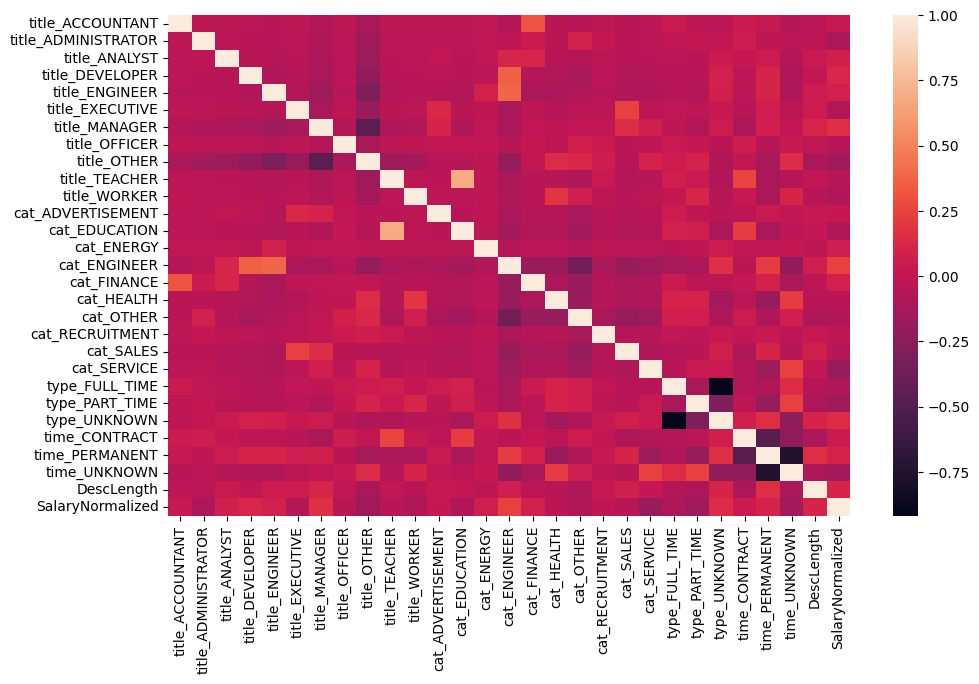

#### CORRELATION VALUES AGAINST NORMALIZED SALARIES ####
title_ACCOUNTANT       0.022029
title_ADMINISTRATOR   -0.105840
title_ANALYST          0.073159
title_DEVELOPER        0.123467
title_ENGINEER         0.078882
title_EXECUTIVE       -0.076125
title_MANAGER          0.168416
title_OFFICER         -0.048545
title_OTHER           -0.156697
title_TEACHER         -0.052664
title_WORKER          -0.083021
cat_ADVERTISEMENT      0.017611
cat_EDUCATION         -0.086039
cat_ENERGY             0.063503
cat_ENGINEER           0.230537
cat_FINANCE            0.079949
cat_HEALTH            -0.034455
cat_OTHER             -0.088534
cat_RECRUITMENT       -0.014714
cat_SALES             -0.049646
cat_SERVICE           -0.186945
type_FULL_TIME        -0.079845
type_PART_TIME        -0.157392
type_UNKNOWN           0.139369
time_CONTRACT          0.037872
time_PERMANENT         0.096680
time_UNKNOWN          -0.134824
DescLength             0.105651
SalaryNormalized       1.000000
Name: SalaryNor

In [15]:
# Show the correlations of all included columns in a heat map
plt.figure(figsize=(11,6.5))
sns.heatmap(salary_.corr())
plt.show()
print("#### CORRELATION VALUES AGAINST NORMALIZED SALARIES ####")
print(salary_.corr()['SalaryNormalized'])

In [16]:
# Use 80% of the dataset as training, and 20% as testing
X = salary_.drop(columns='SalaryNormalized', axis=1)
Y = salary_.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, " TEST SIZE:", x_test.shape)

TRAIN SIZE: (195576, 28)  TEST SIZE: (48895, 28)


In [17]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [18]:
linreg = LinearRegression(fit_intercept=True, positive=False)
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [19]:
# Fit the training data into the linear reg. model, then make predictions on the test data
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [20]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [ 1.31731232e+03 -1.00209042e+04  4.13575826e+03  5.58176624e+03
  1.35701103e+03 -2.61796527e+03  8.37391292e+03 -4.37860324e+03
  1.70424439e+02  1.17054728e+03 -5.08925975e+03  7.66011203e+02
 -5.47888427e+03  1.12943342e+04  5.71735232e+03  4.98835854e+03
  1.56436971e+02 -1.12573126e+03 -9.29445956e+02 -3.53182344e+03
 -1.18566083e+04  1.77618487e+03 -6.03042218e+03  4.25423732e+03
  2.41982166e+03 -1.50415882e+03 -9.15662839e+02  1.47387015e+00]
RANK: 24
INTERCEPT: 26948.188128952825


In [21]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   27871.84761211016 |    19200
  39227.999290487925 |    37500
   8892.202480372587 |    13440
  28524.073704271344 |    37500
   37552.94670762824 |    30500
  45687.876625408215 |   100000
    37807.1657094746 |    31000
   35365.53481050351 |    32500
  41257.518492510935 |    26500
   35691.26011453189 |    14000
   47204.39053178708 |    58800
   34682.65620332803 |    60000
   27530.77415964948 |    24920
   27152.59897697056 |    15360
  45053.210535209975 |    52500
  31719.424198088258 |    23500
   33293.33510037129 |    20640
  33962.472150275746 |    13689
  34265.400790101594 |    12720
   37254.46440173413 |    75000


In [22]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-linreg.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
print("ADJUSTED R2 SCORE:", adj_r2)   # Adjusted R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
# The time in seconds for fitting the estimator on the train set for each cv split
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# The time in seconds for scoring the estimator on the test set for each cv split
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# The score array for train scores for each cv split
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
# The score array for test score for each cv split
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 242245662.6881392
RMSE: 15564.243081118311
MAE: 11526.773853512976
R2 SCORE: 0.18170044019165765
ADJUSTED R2 SCORE: 0.1818339772284101

# CROSS VALIDATION #
FITTING TIME: [0.32490087 0.30627918 0.31377745 0.31375241 0.30403948] -> 0.31254987716674804
SCORING TIME: [0.01468778 0.00880265 0.01058173 0.00908184 0.00876832] -> 0.010384464263916015
TRAIN SCORE: [0.17401269 0.18547573 0.1786791  0.18328004 0.19022615] -> 0.18233474108943232
TEST SCORE: [0.2048904  0.1634308  0.19313829 0.17568343 0.14315751] -> 0.17606008754456043


## 2 - Lasso Regression

In [23]:
lasso = Lasso(alpha=1.0, fit_intercept=True, positive=False, tol=0.0001, selection='cyclic')
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [24]:
# Fit the training data into the lasso model, then make predictions on the test data
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [25]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
print("ITERATIONS:", lasso.n_iter_)   # Number of iterations run by the coord. descent solver to reach the specified tolerance

COEF: [ 1.12074392e+02 -1.11245518e+04  2.96637888e+03  4.41739634e+03
  2.04935217e+02 -3.73552504e+03  7.22724253e+03 -5.45150741e+03
 -9.70001136e+02  0.00000000e+00 -6.17573812e+03  1.63415759e+03
 -4.54461159e+03  1.20914023e+04  6.62026473e+03  5.88380074e+03
  1.03780321e+03 -2.27375003e+02 -0.00000000e+00 -2.62654082e+03
 -1.09431038e+04 -0.00000000e+00 -7.78237829e+03  2.47621564e+03
  3.32900222e+03 -5.79685315e+02 -0.00000000e+00  1.47320618e+00]
INTERCEPT: 28048.51417128805
ITERATIONS: 428


In [26]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   27869.12350506503 |    19200
   39225.43519934606 |    37500
   8929.054572746656 |    13440
   28528.10017269074 |    37500
  37556.979652432696 |    30500
   45690.04131977055 |   100000
   37815.42980461138 |    31000
    35367.1002308414 |    32500
   41254.04011533244 |    26500
  35692.678797604654 |    14000
  47173.389478366575 |    58800
   34685.24972420942 |    60000
  27601.500879603573 |    24920
  27150.198887053873 |    15360
  45047.862528135156 |    52500
  31722.011180576355 |    23500
  33282.468523417716 |    20640
  33951.304131157594 |    13689
   34267.43534718932 |    12720
   37262.97748544298 |    75000


In [27]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-lasso.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 242239920.00883973
RMSE: 15564.058596935432
MAE: 11526.631494673986
R2 SCORE: 0.18171983881324993
ADJUSTED R2 SCORE: 0.18183623829869322

# CROSS VALIDATION #
FITTING TIME: [3.56303215 4.36780238 2.84384537 3.77125812 4.70624709] -> 3.8504370212554933
SCORING TIME: [0.00906897 0.00859904 0.00956917 0.01021361 0.00972319] -> 0.009434795379638672
TRAIN SCORE: [0.17401068 0.18547374 0.1786771  0.18327805 0.19022394] -> 0.1823326996334819
TEST SCORE: [0.20488156 0.16344628 0.19312419 0.17568254 0.14320552] -> 0.17606801929682492


## 3 - Ridge Regression

In [28]:
ridge = Ridge(alpha=1.0, fit_intercept=True, positive=True, tol=0.0001, solver='auto')
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [29]:
# Fit the training data into the ridge model, then make predictions on the test data
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [30]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [2.40195430e+02 0.00000000e+00 1.04301111e+03 2.30413989e+03
 1.77991121e+03 0.00000000e+00 4.96333220e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.26417155e+02
 0.00000000e+00 5.20152449e+02 7.78082811e+03 1.91094743e+03
 7.93192448e-03 7.60473283e-04 2.80051980e-04 0.00000000e+00
 0.00000000e+00 1.42982351e-02 0.00000000e+00 4.54481923e+03
 1.25732450e+03 3.07299507e+03 9.36747164e-04 1.13560502e+00]
INTERCEPT: 23190.970773226793
ITERATIONS: None


In [31]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  23975.689835243003 |    19200
   37530.03460159844 |    37500
  23634.993271515497 |    13440
   34024.37419294053 |    37500
   38093.29392942337 |    30500
    45015.6046514955 |   100000
   40300.96995231925 |    31000
   33111.51623591731 |    32500
   39093.76270963603 |    26500
  33362.484944614705 |    14000
   40837.13468379535 |    58800
   29949.87821392779 |    60000
   33379.79559573713 |    24920
  23421.514587078625 |    15360
  39218.402685604895 |    52500
  36486.365869211775 |    23500
  29475.747398894404 |    20640
  29991.312076489954 |    13689
   31410.15765938721 |    12720
   39875.11807104539 |    75000


In [32]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-ridge.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 263636399.27556014
RMSE: 16236.883915196295
MAE: 12204.923506064555
R2 SCORE: 0.10944308730770935
ADJUSTED R2 SCORE: 0.10685248863492802

# CROSS VALIDATION #
FITTING TIME: [0.22481704 0.2386663  0.25241399 0.24940109 0.21840119] -> 0.2367399215698242
SCORING TIME: [0.01156855 0.00872564 0.01386976 0.01120472 0.00951457] -> 0.010976648330688477
TRAIN SCORE: [0.10123738 0.10918306 0.10495805 0.10783366 0.11314317] -> 0.10727106505163744
TEST SCORE: [0.13568187 0.0806526  0.12551951 0.10980349 0.06193375] -> 0.1027182432673756


## 4 - Polynomial Regression

In [33]:
poly_feat = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True, order='C')
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': True, 'order': 'C'}

In [34]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(195576, 407) (48895, 407)


### Polynomial Regression with Lasso

In [35]:
lasso = Lasso(max_iter=500)
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)

In [36]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 221676092.8807162
RMSE: 14888.790846832264
MAE: 10880.991198893471
R2 SCORE: 0.25118391301044807

# CROSS VALIDATION #
FITTING TIME: [3.65849686 4.50823402 2.84956789 4.11476874 5.07832003] -> 4.041877508163452
SCORING TIME: [0.00969052 0.0097301  0.00969291 0.00948334 0.01273894] -> 0.010267162322998047
TRAIN SCORE: [0.17401068 0.18547376 0.1786771  0.18327805 0.19022395] -> 0.182332706209933
TEST SCORE: [0.20488156 0.16344688 0.19312419 0.17568254 0.14320681] -> 0.17606839820436926


### Polynomial Regression with Ridge

In [37]:
ridge = Ridge(max_iter=2000)
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)

In [38]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 221638542.2065658
RMSE: 14887.529755018655
MAE: 10874.36893361682
R2 SCORE: 0.25131075821290416

# CROSS VALIDATION #
FITTING TIME: [0.12401891 0.11570668 0.10417509 0.12231421 0.1097064 ] -> 0.11518425941467285
SCORING TIME: [0.01080656 0.00985098 0.00873137 0.00967646 0.01152205] -> 0.010117483139038087
TRAIN SCORE: [0.17401269 0.18547573 0.17867909 0.18328004 0.19022615] -> 0.18233473875813017
TEST SCORE: [0.20489111 0.16343209 0.19313835 0.17568294 0.14315769] -> 0.17606043529618995


## 5 - Decision Tree Regression

In [41]:
dtree = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=10,
                             min_impurity_decrease=0.2, ccp_alpha=0.0)
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [47]:
# Fit the training data into the decision tree and make predictions on the test data
# dtree.fit(x_train, y_train)
# y_pred = dtree.predict(x_test)

In [39]:
# Results of metrics
"""mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(dtree, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())"""
print()

MSE: 280585581.50557315
RMSE: 16750.688985996163
MAE: 11508.514428878208
R2 SCORE: 0.05218918973932951
# CROSS VALIDATION #
FITTING TIME: [0.12397575 0.10896587 0.10191512 0.1043613  0.10155749] -> 0.10815510749816895
SCORING TIME: [0.00969529 0.00923848 0.00879478 0.00980115 0.00970602] -> 0.009447145462036132
TRAIN SCORE: [0.17401269 0.18547573 0.17867909 0.18328004 0.19022615] -> 0.18233473875813017
TEST SCORE: [0.20489111 0.16343209 0.19313835 0.17568294 0.14315769] -> 0.17606043529618995


## 6 - Random Forest Regression

In [42]:
rforest = RandomForestRegressor(n_estimators=40, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
                                min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
                                bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.2,
 'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Fit the training data into the random forest, then make predictions on the test data
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

In [44]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 266177079.33495963
RMSE: 16314.934242434434
MAE: 12238.746577111362
R2 SCORE: 0.10086073602368684

# CROSS VALIDATION #
FITTING TIME: [4.66123247 4.62639999 4.70427489 4.7617538  4.67235065] -> 4.685202360153198
SCORING TIME: [0.05664635 0.06077862 0.06369925 0.06237245 0.06143546] -> 0.06098642349243164
TRAIN SCORE: [0.09196763 0.09944724 0.09383982 0.09710288 0.10258852] -> 0.09698921666403171
TEST SCORE: [0.10876498 0.08854655 0.10178449 0.09695829 0.06574006] -> 0.09235887295384967


## 7 - KNN Regression

In [45]:
knnreg = KNeighborsRegressor(n_neighbors=10, leaf_size=100, weights='uniform', algorithm='auto', p=1)
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 100,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [48]:
# Fit the training data into the KNN regression model, then make predictions on the test data
# knnreg.fit(x_train, y_train)
# y_pred = knnreg.predict(x_test)

In [45]:
# print("EFFECTIVE METRIC:", knnreg.effective_metric_)

EFFECTIVE METRIC: manhattan


In [49]:
# Compare the predicted values against the actual ones for the first 20 rows
# for i in range(20):
#     print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

In [50]:
# Results of metrics
"""mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)         
print("R2 SCORE:", r2)     
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())"""
print()

## 8 - Multi-Layer Perceptron Regression

In [51]:
mlpr = MLPRegressor(max_iter=1000, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.1,
                    learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, tol=0.01, max_fun=15000,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-9, n_iter_no_change=10, early_stopping=False, validation_fraction=0.5)
mlpr.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-09,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.01,
 'validation_fraction': 0.5,
 'verbose': False,
 'warm_start': False}

In [52]:
# Fit the training data into the multi-layer perceptron regression model, then make predictions on the test data
mlpr.fit(x_train, y_train)
y_pred = mlpr.predict(x_test)

In [53]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    28123.3609724997 |    19200
    39824.4830645286 |    37500
   9084.081795557337 |    13440
   28979.28790532526 |    37500
   38357.48601548539 |    30500
  46127.960012284166 |   100000
    38402.9870471195 |    31000
   35430.66333978388 |    32500
   42451.76751631185 |    26500
   35852.32627648983 |    14000
   47676.29102829115 |    58800
  35266.336545871316 |    60000
  28529.094312737336 |    24920
    27192.2681529861 |    15360
   45494.81621626755 |    52500
   33115.78223463978 |    23500
  33382.957253286484 |    20640
  34249.178851768396 |    13689
  34340.978951242745 |    12720
    37687.4956386818 |    75000


In [54]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
# Cross validation is disabled due to taking lots of time for fitting
# print("\n# CROSS VALIDATION #")
# cross_val = cross_validate(mlpr, X, Y, cv=5, return_train_score=True)
# print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
# res_cv_train.append(cross_val['train_score'].mean())
# print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
# res_cv_test.append(cross_val['test_score'].mean())

MSE: 242795656.5010461
RMSE: 15581.901568840887
MAE: 11672.243282735357
R2 SCORE: 0.1798425753696219


## Results of Metrics of all ML Models Together

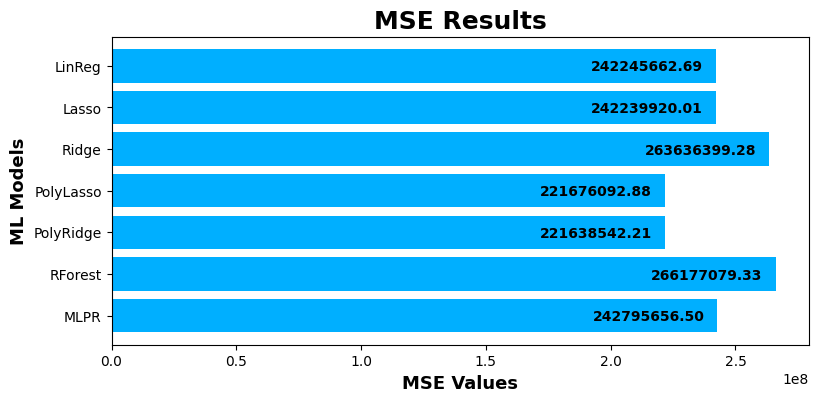

In [58]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'RForest', 'MLPR']
plt.figure(figsize=(9,4))
plt.barh(range(7), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods)
plt.ylim(6.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_mse[i]-50000000, i+0.12, "{:.2f}".format(res_mse[i]), fontweight='bold')
plt.show()

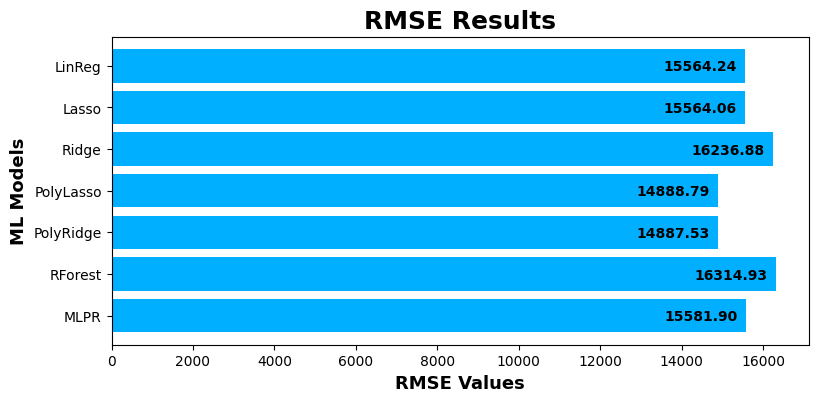

In [59]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods)
plt.ylim(6.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_rmse[i]-2000, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

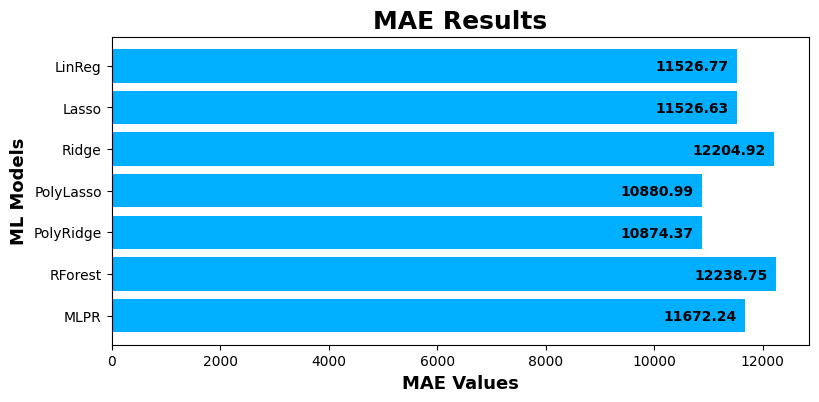

In [60]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods)
plt.ylim(6.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_mae[i]-1500, i+0.12, "{:.2f}".format(res_mae[i]), fontweight='bold')
plt.show()

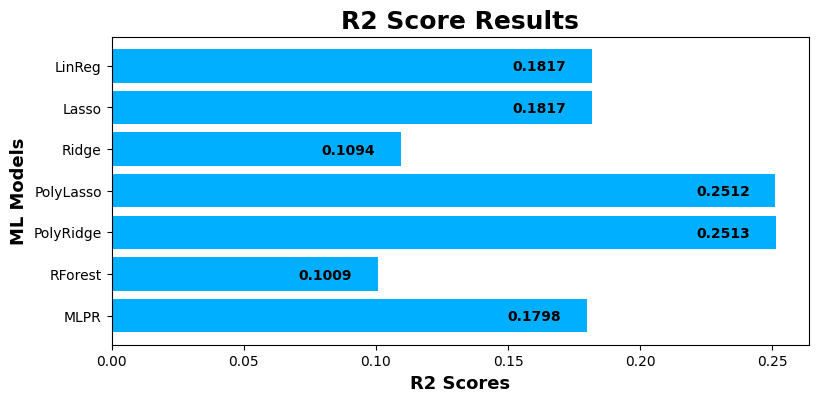

In [61]:
plt.figure(figsize=(9,4))
plt.barh(range(7), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(7), methods)
plt.ylim(6.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(7):
    plt.text(res_r2[i]-0.03, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

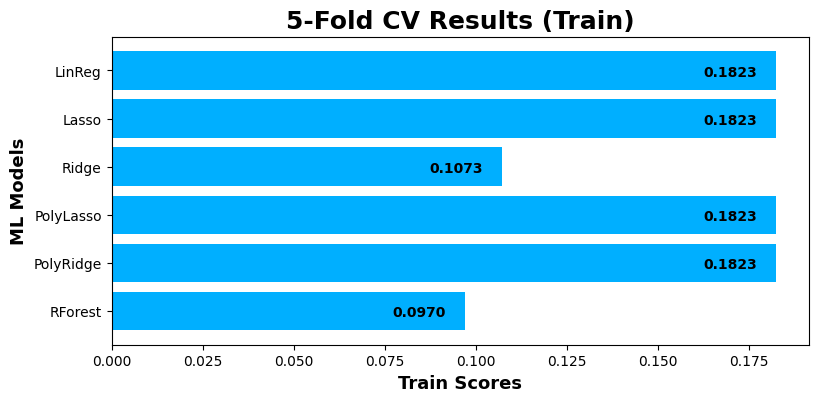

In [68]:
plt.figure(figsize=(9,4))
plt.barh(range(6), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(6), methods[:6])
plt.ylim(5.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(6):
    plt.text(res_cv_train[i]-0.02, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

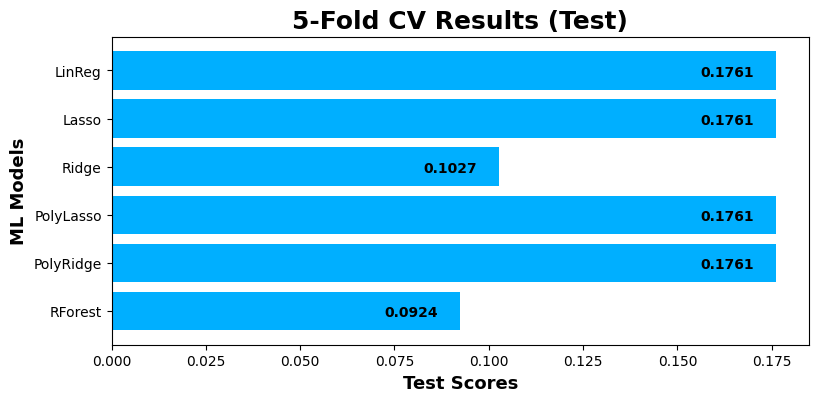

In [69]:
plt.figure(figsize=(9,4))
plt.barh(range(6), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(6), methods[:6])
plt.ylim(5.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(6):
    plt.text(res_cv_test[i]-0.02, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()